In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 18.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

In [4]:
!mkdir datasets
!mkdir datasets/train
!mkdir datasets/valid
!mkdir datasets/test

train_path='datasets/train/'
valid_path='datasets/valid/'
test_path='datasets/test/'

mkdir: cannot create directory ‘datasets’: File exists
mkdir: cannot create directory ‘datasets/train’: File exists
mkdir: cannot create directory ‘datasets/valid’: File exists
mkdir: cannot create directory ‘datasets/test’: File exists


In [5]:
ano_paths=[]
import os,random
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt'):
    for filename in filenames:
        if filename[-4:]=='.txt':
            ano_paths+=[(os.path.join(dirname, filename))]

n=1000#len(ano_paths)
print(n)
N=list(range(n))
random.shuffle(N)

train_ratio = 0.7
valid_ratio = 0.2
test_ratio = 0.1

train_size = int(train_ratio*n)
valid_size = int(valid_ratio*n)

train_i = N[:train_size]
valid_i = N[train_size:train_size+valid_size]
test_i = N[train_size+valid_size:]

print(train_i)
print(valid_i)
print(test_i)

1000
[597, 55, 159, 813, 485, 767, 618, 339, 771, 875, 91, 160, 439, 445, 753, 545, 923, 202, 538, 696, 793, 342, 209, 842, 713, 164, 633, 869, 305, 757, 50, 632, 46, 429, 816, 361, 811, 968, 85, 610, 84, 330, 791, 498, 334, 211, 251, 642, 739, 764, 376, 227, 59, 14, 922, 522, 568, 549, 552, 299, 577, 920, 176, 978, 867, 913, 956, 105, 10, 873, 257, 70, 194, 254, 601, 103, 993, 58, 255, 574, 45, 606, 92, 725, 644, 360, 567, 651, 102, 32, 438, 845, 964, 354, 37, 494, 460, 307, 931, 288, 973, 666, 273, 200, 781, 831, 548, 779, 532, 892, 461, 306, 938, 919, 678, 117, 69, 136, 151, 985, 189, 519, 266, 165, 322, 125, 34, 455, 285, 746, 836, 205, 576, 42, 720, 736, 345, 291, 654, 513, 663, 373, 350, 780, 716, 706, 115, 492, 409, 131, 514, 171, 851, 806, 782, 434, 544, 468, 988, 809, 403, 843, 104, 585, 337, 3, 269, 346, 343, 954, 628, 480, 588, 344, 511, 894, 130, 926, 827, 375, 909, 143, 955, 180, 759, 294, 134, 600, 188, 327, 133, 614, 295, 981, 537, 145, 415, 44, 925, 650, 840, 420, 184, 

In [6]:
for i in train_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {train_path}
        !cp {img_path} {train_path}
    except:
        continue
print(len(os.listdir(train_path)))

cp: cannot stat '/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/classes.jpg': No such file or directory
1408


In [7]:
for i in valid_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {valid_path}
        !cp {img_path} {valid_path}
    except:
        continue
print(len(os.listdir(valid_path)))

400


In [8]:
for i in test_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {test_path}
        !cp {img_path} {test_path}
    except:
        continue
print(len(os.listdir(test_path)))

200


In [9]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.train(data='/content/drive/MyDrive/BBBS_Hackathon/data.yaml', epochs=50)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/BBBS_Hackathon/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 22.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train... 699 images, 0 backgrounds, 0 corrupt: 100%|██████████| 699/699 [00:00<00:00, 1105.36it/s]

train: New cache created: /content/datasets/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 508.83it/s]

val: New cache created: /content/datasets/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.32G      1.396      2.527      1.607         30        640: 100%|██████████| 44/44 [00:22<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        200        222    0.00357      0.964       0.49      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.27G      1.435      1.913      1.626         28        640: 100%|██████████| 44/44 [00:21<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        200        222      0.446       0.23      0.286     0.0955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      1.512      1.829      1.663         31        640: 100%|██████████| 44/44 [00:28<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        200        222      0.548      0.491      0.468      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.27G       1.53      1.668       1.67         31        640: 100%|██████████| 44/44 [00:20<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        200        222      0.257       0.32       0.23      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.27G      1.494       1.56      1.655         24        640: 100%|██████████| 44/44 [00:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


                   all        200        222       0.41      0.563      0.373      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G      1.496      1.484       1.65         23        640: 100%|██████████| 44/44 [00:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        200        222      0.748      0.703      0.753      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.27G      1.443      1.391      1.611         31        640: 100%|██████████| 44/44 [00:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        200        222      0.742      0.662      0.741      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.27G       1.41      1.286      1.561         31        640: 100%|██████████| 44/44 [00:20<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        200        222      0.779      0.796      0.826       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G      1.394      1.263      1.563         32        640: 100%|██████████| 44/44 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        200        222      0.758      0.766      0.822      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.28G      1.379       1.25      1.556         26        640: 100%|██████████| 44/44 [00:20<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        200        222       0.84      0.833      0.859      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.27G      1.331      1.129      1.499         25        640: 100%|██████████| 44/44 [00:20<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        200        222      0.839      0.806      0.845      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.328      1.101      1.506         27        640: 100%|██████████| 44/44 [00:21<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        200        222      0.829       0.81      0.863      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.28G      1.316      1.112      1.492         23        640: 100%|██████████| 44/44 [00:20<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        200        222      0.863      0.849      0.906      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.26G      1.321      1.047      1.485         33        640: 100%|██████████| 44/44 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        200        222      0.876      0.793      0.859      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G      1.326      1.058      1.489         29        640: 100%|██████████| 44/44 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        200        222      0.891      0.846      0.903      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.31G      1.265      1.008      1.453         25        640: 100%|██████████| 44/44 [00:20<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        200        222      0.898      0.878      0.908      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.28G      1.255     0.9924      1.451         30        640: 100%|██████████| 44/44 [00:20<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        200        222      0.915      0.874       0.93      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.26G      1.263     0.9824      1.439         31        640: 100%|██████████| 44/44 [00:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        200        222      0.885      0.899       0.93      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G      1.234     0.9557      1.425         31        640: 100%|██████████| 44/44 [00:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        200        222      0.879      0.878      0.897      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G      1.215     0.9388      1.408         25        640: 100%|██████████| 44/44 [00:20<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        200        222      0.931      0.829      0.917      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G      1.207     0.9092      1.417         30        640: 100%|██████████| 44/44 [00:23<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        200        222      0.926      0.899       0.93       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.26G      1.217     0.8966      1.412         36        640: 100%|██████████| 44/44 [00:20<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        200        222      0.931      0.905      0.937      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.27G      1.154     0.8647      1.365         36        640: 100%|██████████| 44/44 [00:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        200        222      0.917      0.893      0.927      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.31G      1.197     0.8828      1.398         41        640: 100%|██████████| 44/44 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        200        222      0.884      0.887      0.915      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.26G      1.144     0.8263      1.367         28        640: 100%|██████████| 44/44 [00:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        200        222      0.932      0.874       0.93      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.26G      1.172     0.8385      1.371         23        640: 100%|██████████| 44/44 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        200        222      0.908      0.894      0.928      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.26G      1.174     0.8379      1.374         21        640: 100%|██████████| 44/44 [00:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        200        222      0.914       0.91      0.918      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.28G      1.136     0.7921       1.34         34        640: 100%|██████████| 44/44 [00:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        200        222       0.93      0.903       0.93      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G      1.109     0.7789       1.32         33        640: 100%|██████████| 44/44 [00:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        200        222      0.918      0.883      0.924      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.28G      1.092     0.7557      1.322         27        640: 100%|██████████| 44/44 [00:24<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        200        222      0.948      0.909      0.942      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.27G      1.099     0.7539      1.333         25        640: 100%|██████████| 44/44 [00:21<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        200        222       0.94      0.905      0.946       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.27G      1.108     0.7407      1.337         27        640: 100%|██████████| 44/44 [00:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        200        222      0.921      0.919      0.935      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.28G      1.074     0.7354      1.312         34        640: 100%|██████████| 44/44 [00:20<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


                   all        200        222      0.918      0.913      0.932      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.27G      1.067     0.7222      1.312         26        640: 100%|██████████| 44/44 [00:21<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        200        222      0.948      0.905      0.937      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.3G       1.07     0.7321      1.318         27        640: 100%|██████████| 44/44 [00:24<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        200        222      0.898      0.914      0.939      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G      1.027     0.7039      1.284         29        640: 100%|██████████| 44/44 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        222      0.943      0.901      0.943      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.26G       1.06     0.6967      1.293         32        640: 100%|██████████| 44/44 [00:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        200        222      0.912      0.932      0.936       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.26G      1.031     0.6845      1.297         25        640: 100%|██████████| 44/44 [00:21<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        200        222      0.943      0.914      0.943      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.26G      1.007     0.6867      1.258         34        640: 100%|██████████| 44/44 [00:21<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        200        222      0.938      0.889      0.933      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G      1.016      0.692      1.286         34        640: 100%|██████████| 44/44 [00:20<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        200        222      0.954      0.931      0.945      0.611


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.27G     0.8876     0.5916      1.251         11        640: 100%|██████████| 44/44 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        200        222      0.935      0.896      0.939      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G     0.8639     0.5212      1.239         11        640: 100%|██████████| 44/44 [00:20<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        200        222      0.914      0.914      0.938      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.27G     0.8462     0.5063      1.222         14        640: 100%|██████████| 44/44 [00:20<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        200        222      0.958      0.915       0.95      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.27G     0.8364     0.4714      1.203         11        640: 100%|██████████| 44/44 [00:25<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        200        222      0.959      0.919      0.943      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.27G     0.8154     0.4663      1.181         20        640: 100%|██████████| 44/44 [00:20<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        200        222       0.94      0.923      0.942      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.27G     0.7989       0.46      1.184         11        640: 100%|██████████| 44/44 [00:21<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        200        222      0.946      0.914      0.947      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.27G     0.7851     0.4463      1.166         12        640: 100%|██████████| 44/44 [00:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        200        222      0.917      0.949      0.948      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.27G     0.7762     0.4505      1.171         15        640: 100%|██████████| 44/44 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        200        222      0.925      0.942      0.944      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.27G     0.7636     0.4267      1.154         11        640: 100%|██████████| 44/44 [00:21<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        200        222      0.937      0.944      0.949      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.27G     0.7517     0.4385      1.148         11        640: 100%|██████████| 44/44 [00:20<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        200        222      0.937      0.938      0.949      0.642



50 epochs completed in 0.373 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]


                   all        200        222      0.937      0.944      0.949      0.644
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train



image 1/1 /content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/0005.jpg: 448x640 1 drone, 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


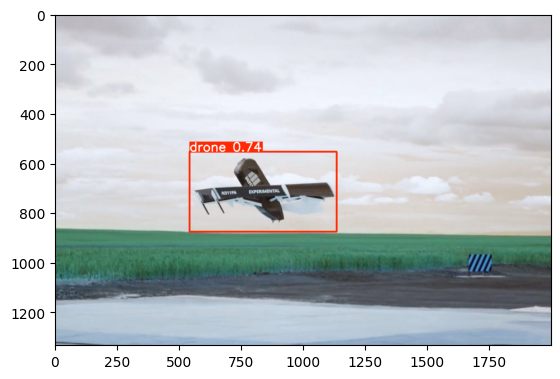

In [12]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO('/content/runs/detect/train/weights/best.pt')
image_path = "/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/0005.jpg"
results = model(image_path)
annotated_image = results[0].plot()
plt.imshow(annotated_image)
plt.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/0035.jpg: 448x640 1 drone, 35.2ms
Speed: 12.3ms preprocess, 35.2ms inference, 731.6ms postprocess per image at shape (1, 3, 448, 640)


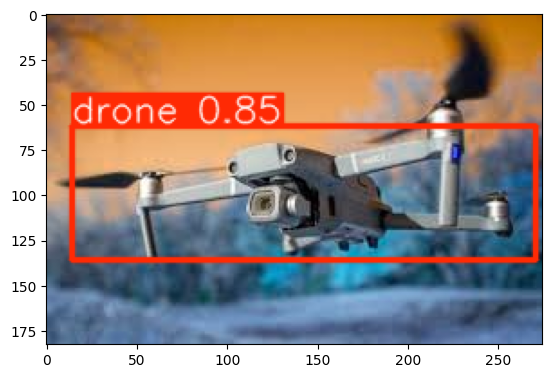

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO('/content/best.pt')
image_path = "/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/0035.jpg"
results = model(image_path)
annotated_image = results[0].plot()
plt.imshow(annotated_image)
plt.show()


image 1/1 /content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/foto14704.jpg: 384x640 1 drone, 89.8ms
Speed: 2.2ms preprocess, 89.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


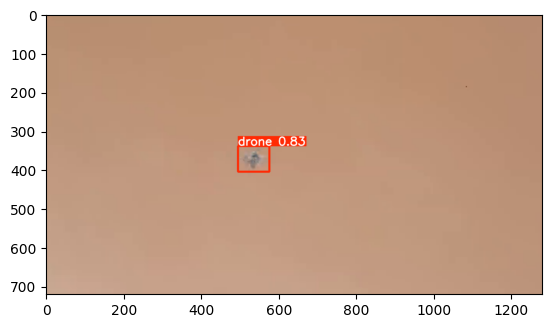

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO('/content/best.pt')
image_path = "/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/foto14704.jpg"
results = model(image_path)
annotated_image = results[0].plot()
plt.imshow(annotated_image)
plt.show()


image 1/1 /content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/pic_1213.jpg: 448x640 1 drone, 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


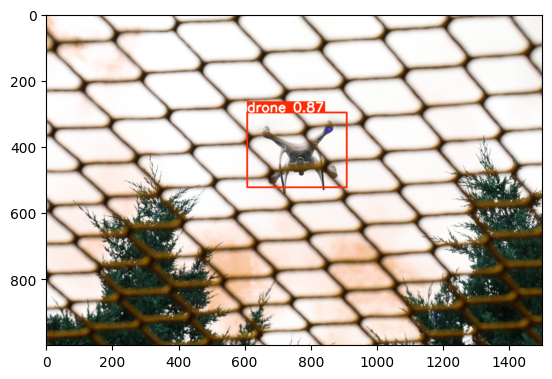

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO('/content/best.pt')
image_path = "/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/pic_1213.jpg"
results = model(image_path)
annotated_image = results[0].plot()
plt.imshow(annotated_image)
plt.show()


image 1/1 /content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/0008.jpg: 448x640 1 drone, 10.9ms
Speed: 3.4ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


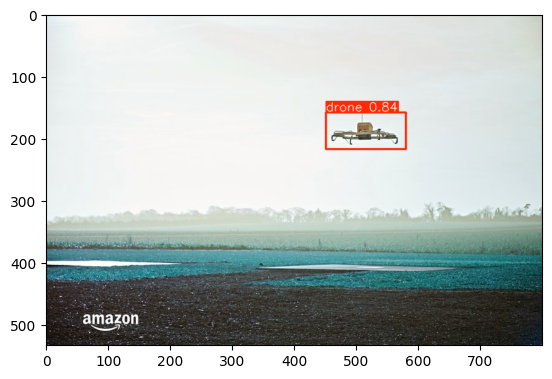

In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO('/content/best.pt')
image_path = "/content/drive/MyDrive/BBBS_Hackathon/Drone_Dataset/drone_dataset_yolo/drone_dataset_yolo/dataset_txt/0008.jpg"
results = model(image_path)
annotated_image = results[0].plot()
plt.imshow(annotated_image)
plt.show()